In [1]:
import numpy as  np
import pandas as pd
from sklearn.model_selection import train_test_split
from decision_tree_classifier import DecisionTree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('banknote_dataset.txt')

In [3]:
data_x = data.drop(['class'], axis=1).values
data_y = data['class'].values
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [4]:
model = DecisionTree()
model.fit(x_train, y_train)

In [5]:
model.score(x_test, y_test)

{'acc': 0.9818181818181818,
 'r2': 0.9268461374760587,
 'precision': 0.968503937007874,
 'recall': 0.9919354838709677,
 'f1': 0.9800796812749005}

In [6]:
history_train = []
history_test = []
for depth in range(1, 30):
    model = DecisionTree(max_depth=depth, min_entropy=0)
    model.fit(x_train, y_train)
    history_test.append(model.score(x_test, y_test))
    history_train.append(model.score(x_train, y_train))

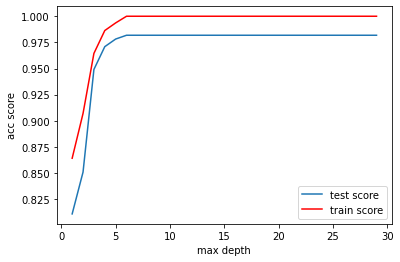

In [7]:
plt.plot(range(1, 30), [i['acc'] for i in history_test], label='test score')
plt.plot(range(1, 30), [i['acc'] for i in history_train], c='red', label='train score')
plt.ylabel('acc score')
plt.xlabel('max depth')
plt.legend()
plt.show()